In [65]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# loading and processing MNIST data
BATCH_SIZE = 64
NUM_WORKERS = 2

# creates a transform object to convert images of range [0,1] to tensors of [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor()])

# numbers that we are classifying
numbers = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# download the MNIST training data
trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transforms.ToTensor())

# load the MNIST training data
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS)

# download the MNIST testing data
testset = torchvision.datasets.MNIST(root='./data',
                                      train=False,
                                      download=True,
                                      transform=transforms.ToTensor())

# load the MNIST testing data
testloader = torch.utils.data.DataLoader(testset,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS)

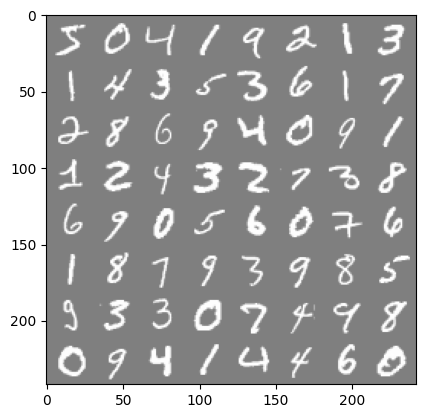

5     0     4     1     9     2     1     3     1     4     3     5     3     6     1     7     2     8     6     9     4     0     9     1     1     2     4     3     2     7     3     8     6     9     0     5     6     0     7     6     1     8     7     9     3     9     8     5     9     3     3     0     7     4     9     8     0     9     4     1     4     4     6     0    


In [67]:
# image handling functions

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{numbers[labels[j]]:5s}' for j in range(BATCH_SIZE)))

In [68]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

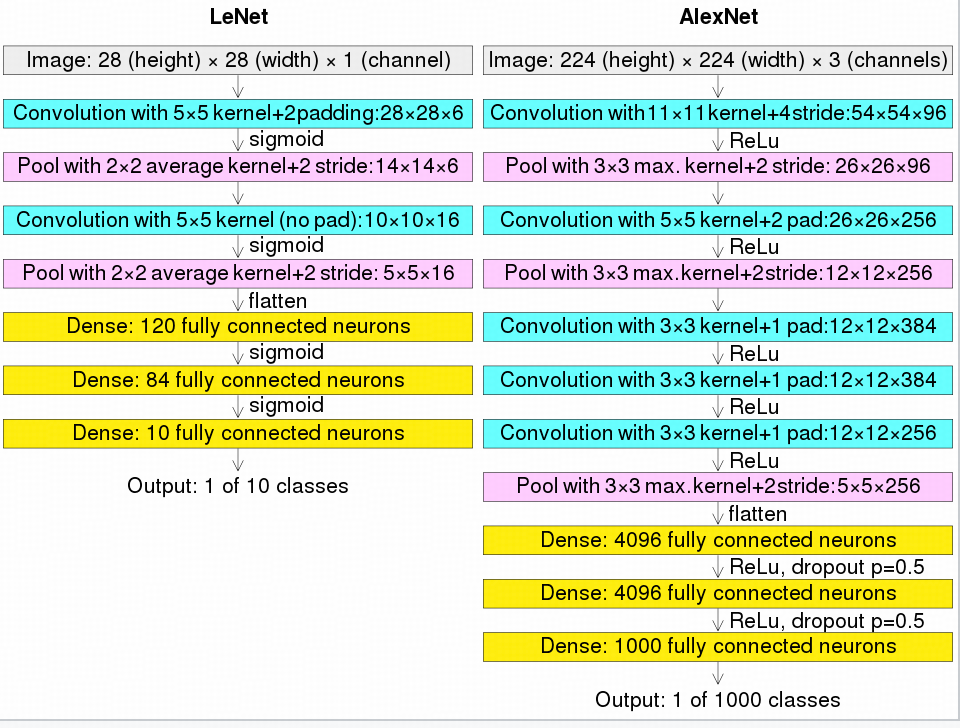

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = LeNet5().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [70]:
EPOCHS = 10

for epoch in range(EPOCHS):
    running_loss = 0.0

    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.159
[1,   400] loss: 0.033
[1,   600] loss: 0.019
[1,   800] loss: 0.015
[2,   200] loss: 0.012
[2,   400] loss: 0.009
[2,   600] loss: 0.008
[2,   800] loss: 0.008
[3,   200] loss: 0.007
[3,   400] loss: 0.006
[3,   600] loss: 0.006
[3,   800] loss: 0.006
[4,   200] loss: 0.005
[4,   400] loss: 0.004
[4,   600] loss: 0.005
[4,   800] loss: 0.005
[5,   200] loss: 0.004
[5,   400] loss: 0.003
[5,   600] loss: 0.004
[5,   800] loss: 0.004
[6,   200] loss: 0.003
[6,   400] loss: 0.002
[6,   600] loss: 0.003
[6,   800] loss: 0.003
[7,   200] loss: 0.003
[7,   400] loss: 0.002
[7,   600] loss: 0.003
[7,   800] loss: 0.003
[8,   200] loss: 0.002
[8,   400] loss: 0.002
[8,   600] loss: 0.002
[8,   800] loss: 0.002
[9,   200] loss: 0.002
[9,   400] loss: 0.001
[9,   600] loss: 0.002
[9,   800] loss: 0.002
[10,   200] loss: 0.001
[10,   400] loss: 0.001
[10,   600] loss: 0.002
[10,   800] loss: 0.002
Finished Training
